Case Study: An Analysis of Demographic and Behaviour Trends using Social Media

This comprehensive dataset comprises several dataframes, providing valuable insights into the world of professional networking media , LinkedIn. With over 60,000 entries, it includes information about companies, jobs, industries, skills, company profiles, job postings, and industry trends. We try to analyse the behaviour trends of this dataset.

In [1]:
#importing the necessary libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import statistics

In [2]:
#loading the dataset
company = pd.read_csv('companies.csv')
benefit = pd.read_csv('benefits.csv')
company_indus = pd.read_csv('company_industries.csv')
job_skill = pd.read_csv('job_skills.csv')
job_posting = pd.read_csv('job_postings.csv')
job_industry = pd.read_csv('job_industries.csv')
company_special = pd.read_csv('company_specialities.csv')
emp_count = pd.read_csv('employee_counts.csv')

In [3]:
#printing the information about the datasets
print(company.info())
print(benefit.info())
print(company_indus.info())
print(job_skill.info())
print(job_posting.info())
print(job_industry.info())
print(company_special.info())
print(emp_count.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6063 entries, 0 to 6062
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_id    6063 non-null   int64  
 1   name          6063 non-null   object 
 2   description   5999 non-null   object 
 3   company_size  5474 non-null   float64
 4   state         6060 non-null   object 
 5   country       6063 non-null   object 
 6   city          6063 non-null   object 
 7   zip_code      6055 non-null   object 
 8   address       6058 non-null   object 
 9   url           6063 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 473.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13761 entries, 0 to 13760
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   job_id    13761 non-null  int64 
 1   inferred  13761 non-null  int64 
 2   type      13761 non-null  object
dtypes: in

 Summary of missing value counts for each column in each CSV file in the linkedin dataset directory

In [4]:
directory = 'D:/notes/SEM 3/SNA/data'
files = [file for file in os.listdir(directory) if file.endswith('.csv')]
missing_counts = {}
for file in files:
    path = os.path.join(directory, file)
    df = pd.read_csv(path) 
    missing_counts[file] = df.isna().sum()
missing_counts_dfs = {key: pd.DataFrame(value).T for key, value in missing_counts.items()}
for key, value in missing_counts_dfs.items():
    print(f"Missing Value Counts for {key}:")
    print(value)
    print('\n')


Missing Value Counts for benefits.csv:
   job_id  inferred  type
0       0         0     0


Missing Value Counts for companies.csv:
   company_id  name  description  company_size  state  country  city  \
0           0     0           64           589      3        0     0   

   zip_code  address  url  
0         8        5    0  


Missing Value Counts for company_industries.csv:
   company_id  industry
0           0         0


Missing Value Counts for company_specialities.csv:
   company_id  speciality
0           0           0


Missing Value Counts for employee_counts.csv:
   company_id  employee_count  follower_count  time_recorded
0           0               0               0              0


Missing Value Counts for job_industries.csv:
   job_id  industry_id
0       0            0


Missing Value Counts for job_postings.csv:
   job_id  company_id  title  description  max_salary  med_salary  min_salary  \
0       0         366      0            1       10365       14905       1

In [5]:
#to count the occurrences of each unique 'job_id'
benefit.value_counts('job_id')

job_id
3693044636    12
3694137594    12
3693049298    12
3693044326    12
3699082856    12
              ..
3699079828     1
3694112261     1
3699079863     1
3699079877     1
3697390048     1
Length: 5496, dtype: int64

In [6]:
#to count the occurrences of each unique company_id
count_company = company['company_id'].value_counts().reset_index()
#rename the count column to 'count'
count_company = count_company.rename(columns={'company_id': 'count'})
#filter for companies with a count greater than 1
filtered_companies = count_company[count_company['count'] > 1]
filtered_companies

,index,count


An inner join between two DataFrames, 'job_posting' and 'company,' based on the 'company_id' column is performed to analyse which companies posted which jobs and also add the company information in job_postings data frames

In [7]:
job_posting=job_posting.merge(company,on='company_id',how='inner')
job_posting.head()

,job_id,company_id,title,description_x,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,compensation_type,name,description_y,company_size,state,country,city,zip_code,address,url
0,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,CargoLogin.,CargoLogin is a freight and logistics company ...,1.0,California,US,Santa Clarita,28358,Constellation Rd,https://www.linkedin.com/company/cargologinllc
1,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,NaN,Employvision Inc.,Employvision is a talent acquisition and manag...,1.0,New Jersey,US,Somerset,08873,285 Davidson Ave,https://www.linkedin.com/company/employvision
2,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,NaN,First Baptist Church Forney,NaN,2.0,Texas,US,Forney,75126,1003 College St,https://www.linkedin.com/company/fbc-forney
3,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,NaN,Ken Fulk Inc,"Ken Fulk Inc, is a creative think tank based o...",1.0,California,US,San Francisco,94103,310 Seventh Street,https://www.linkedin.com/company/ken-fulk-inc.
4,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.0,NaN,37000.0,YEARLY,Full-time,"Albany, GA",...,BASE_SALARY,Sunnyland Farms,Here at Sunnyland Farms we have been growing a...,2.0,Georgia,US,Albany,31705-5716,2314 Willson Rd,https://www.linkedin.com/company/sunnyland-farms


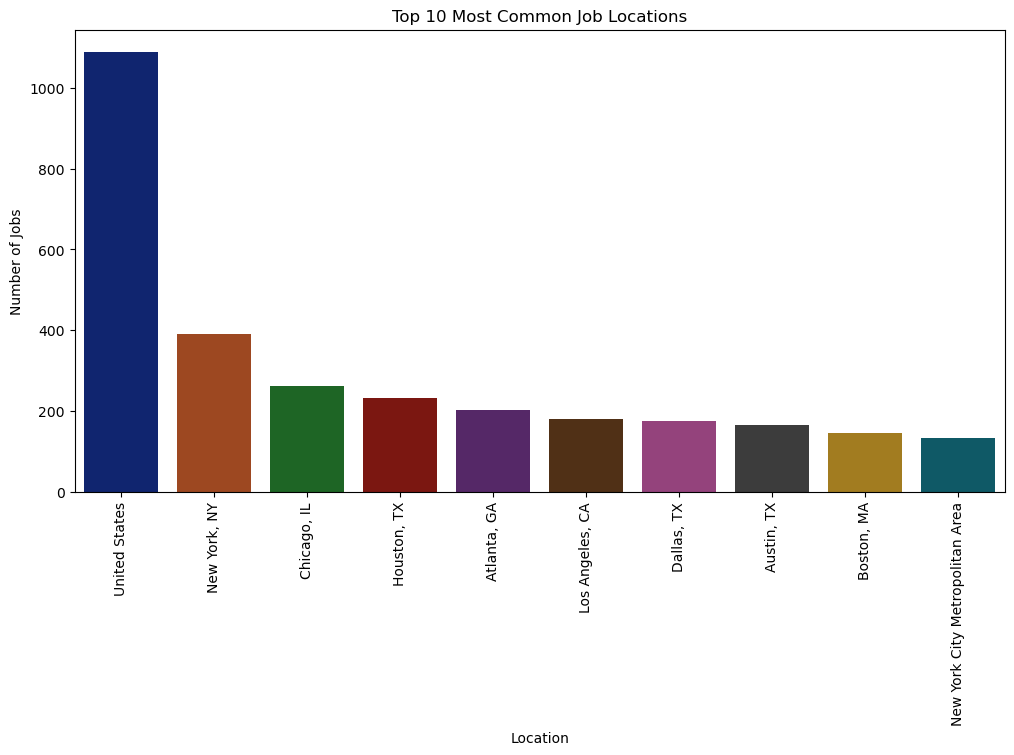

In [8]:
#top locations where most jobs are posted
top_locations = job_posting['location'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='dark')
plt.title('Top 10 Most Common Job Locations')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=90)
plt.show()

In [26]:
#to know the job_posting that are sponsored and not
job_posting['sponsored'].value_counts()

0    10968
1     4502
Name: sponsored, dtype: int64

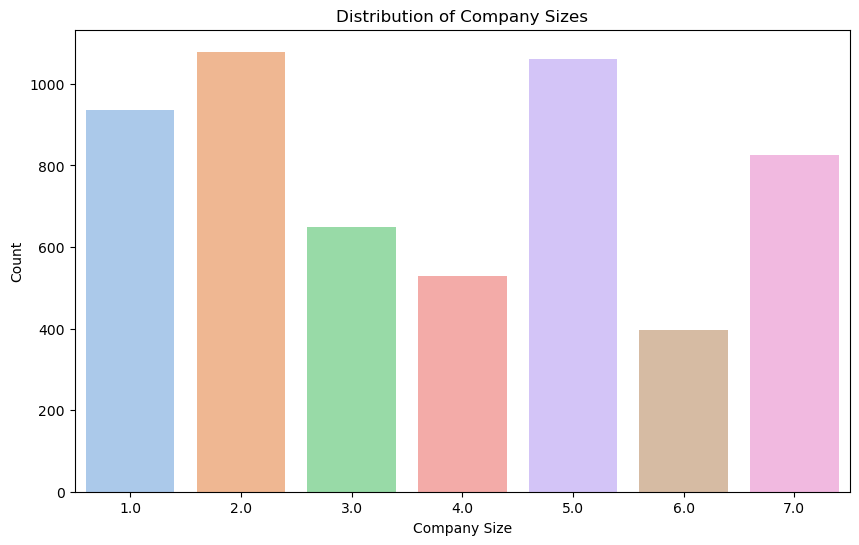

In [10]:
#creating a count plot to visualize the distribution of company sizes
plt.figure(figsize=(10, 6))
sns.countplot(x='company_size', data=company, palette='pastel')
plt.title('Distribution of Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Creating a dataframe 'companies_industry' that combines information about companies and their respective industries. visually identifing The top 10 industries with the most companies, ie; identifing industries that have the highest concentration of companies

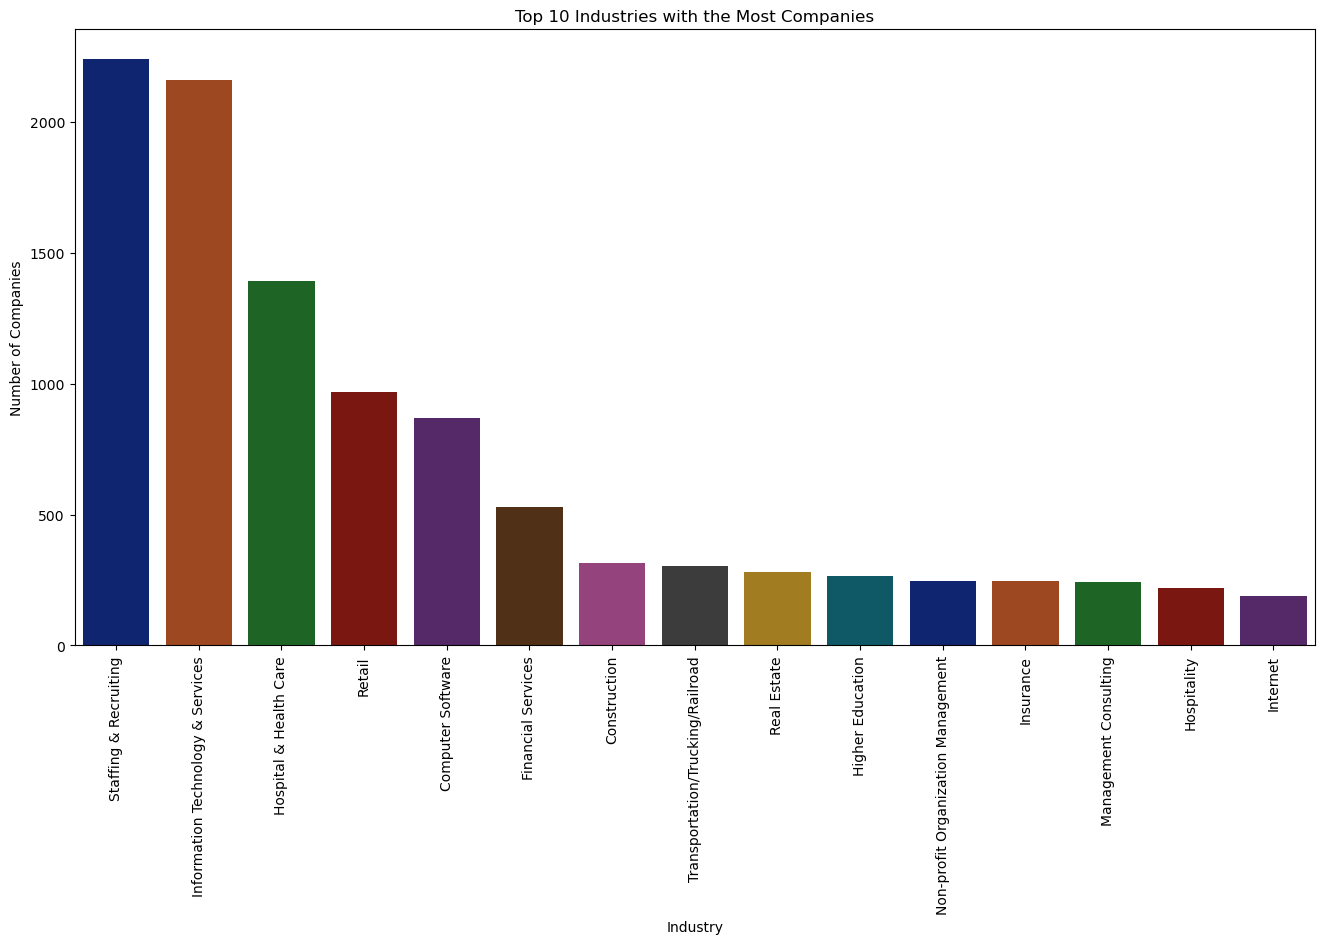

In [11]:
companies_industry = pd.merge(company, company_indus, on='company_id')
top_industries_company = companies_industry['industry'].value_counts().head(15)
plt.figure(figsize=(16, 8))
sns.barplot(x=top_industries_company.index, y=top_industries_company.values, palette='dark')
plt.title('Top 10 Industries with the Most Companies')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.xticks(rotation=90)
plt.show()

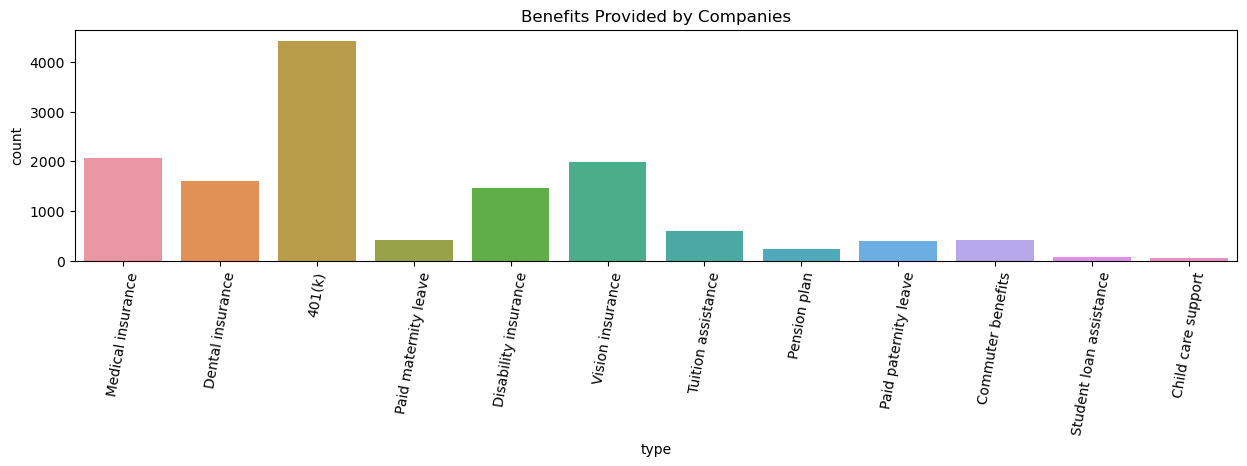

In [12]:
#types of benefits that are most commonly offered by companies
plt.figure(figsize=(15,3))
sns.countplot(data=benefit,x='type')
plt.title('Benefits Provided by Companies')
plt.xticks(rotation = 80)
plt.show()

To identify the areas in which companies specialize and the most common specialities among the companies.

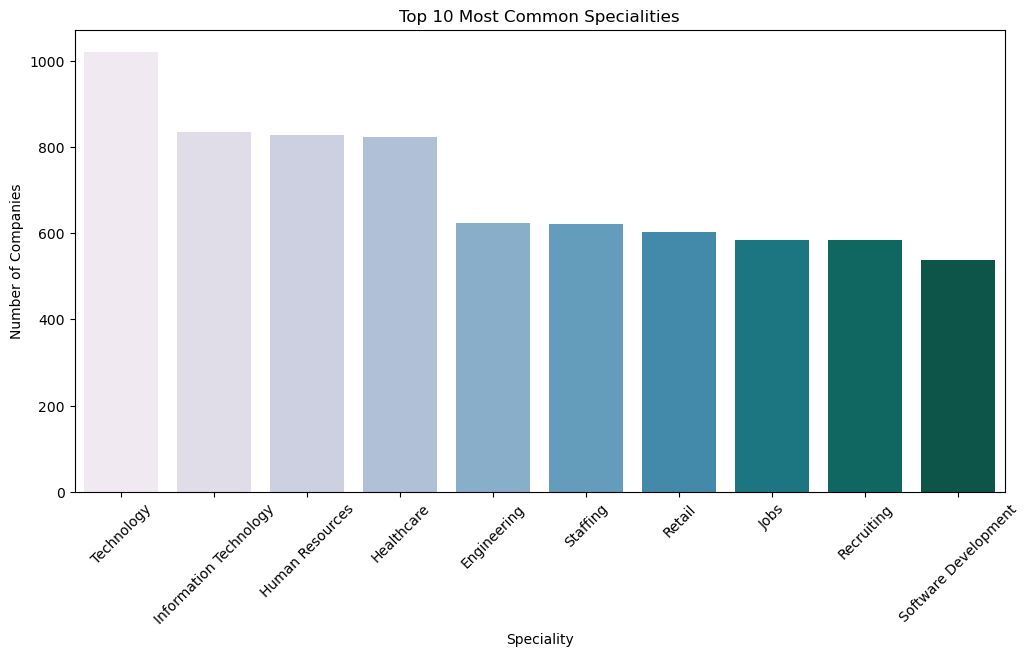

In [13]:
top_specialities = company_special['speciality'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_specialities.index, y=top_specialities.values, palette='PuBuGn')
plt.title('Top 10 Most Common Specialities')
plt.xlabel('Speciality')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.show()

to analyze company data along with employee count information for companies that exist in the emp_count and company_jobs dataset.

In [14]:
#creating a new df with company_id and employee_count columns
emp_count=emp_count[['company_id','employee_count']].copy()
emp_count.drop_duplicates(inplace=True)#droppinng the duplicates
emp_count.loc[emp_count.duplicated()]#ensuring all the duplicates are removed
company_jobs=company.merge(emp_count,on='company_id',how='inner')#merging the dataframes


In [15]:
#company names and their employee counts
company_name=company_jobs[['name','employee_count']]
company_name.loc[company_name.duplicated()]
company_name=company_name.sort_values(by='employee_count',ascending=False)


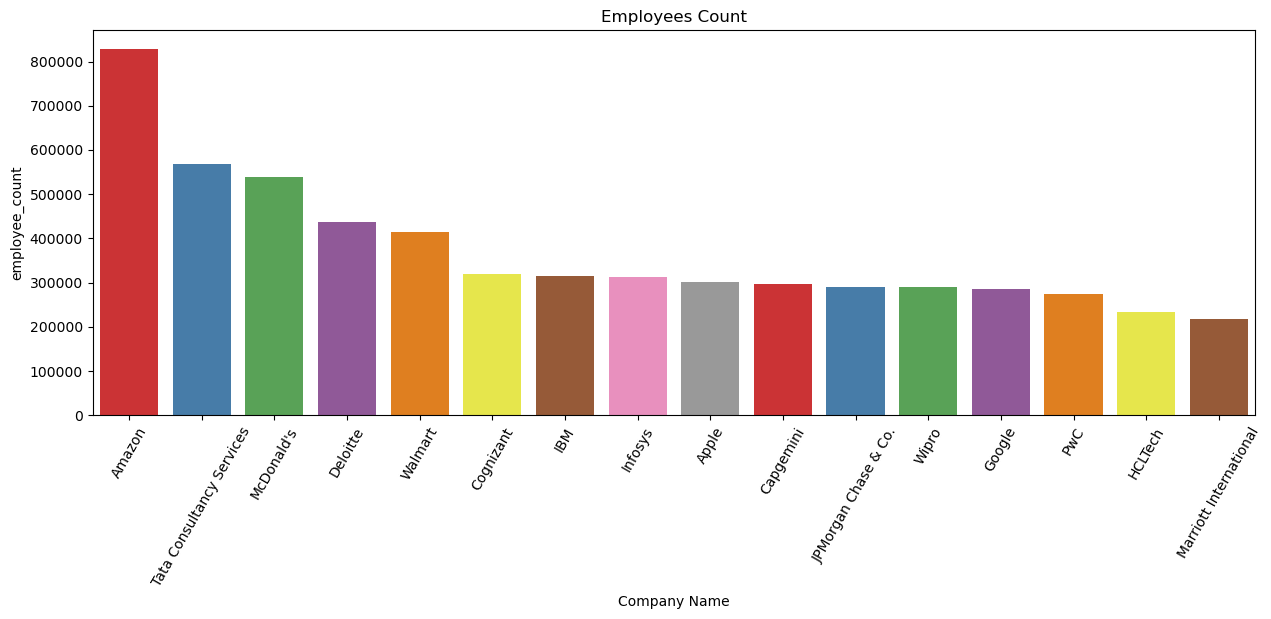

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(data=company_name.head(20),x='name',y='employee_count',palette='Set1')
plt.xticks(rotation = 60)
plt.title('Employees Count')
plt.xlabel('Company Name')
plt.show()

In [17]:
company_jobs['country'].unique()

array(['US', 'OO', 'DE', 'GB', 'SE', 'FR', 'IN', 'CA', 'CH', 'NL', 'DK',
       'IE', 'SG', 'AU', '0', 'FI', 'SA', 'TW', 'JP', 'IT', 'NO', 'MX',
       'HK', 'AT', 'BM', 'BE', 'ES', 'IS', 'AE', 'CN', 'IL', 'NZ', 'HU',
       'KR', 'LU', 'KE', 'CO', 'PR', 'PH', 'MD', 'GE', 'CZ', 'BR', 'TR',
       'HR', 'KY', 'VN', 'ID', 'UY', 'AR'], dtype=object)

In [18]:
Country=company_jobs[company_jobs['country'] != '0']

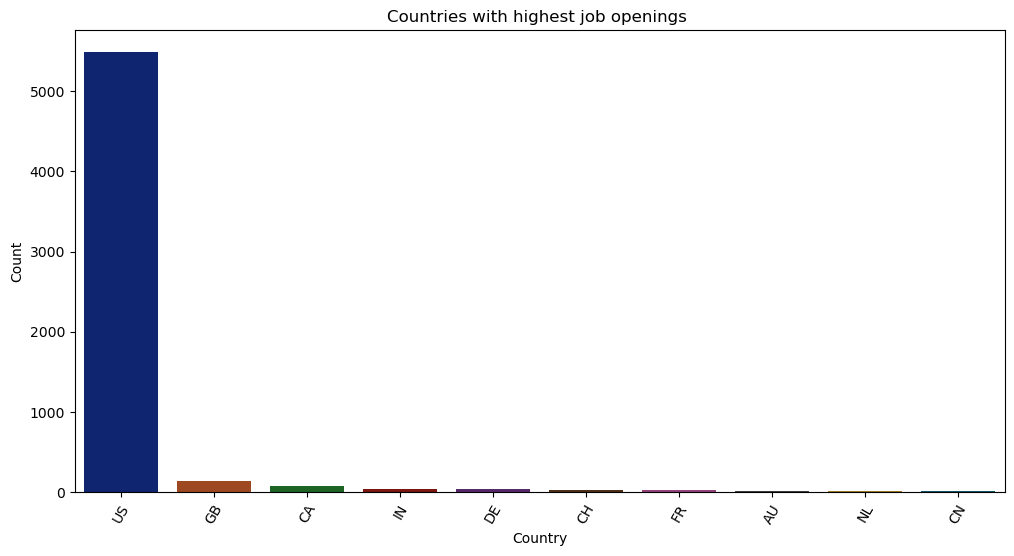

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(data=Country,x='country',order=Country['country'].value_counts().head(10).index,palette ='dark')
plt.title('Countries with highest job openings ')
plt.xticks(rotation = 60)
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

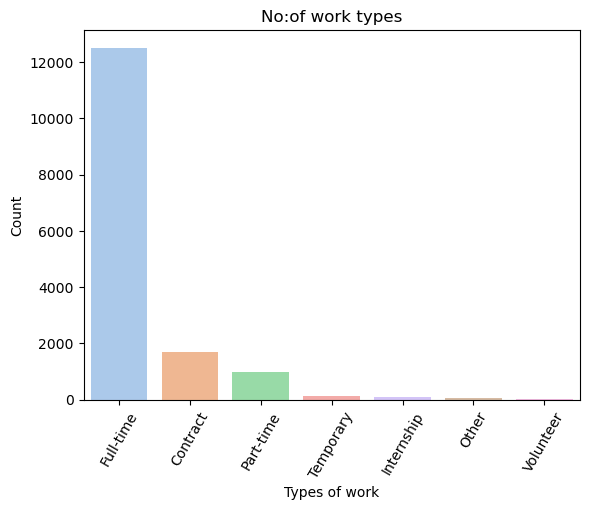

In [20]:
sns.countplot(data=job_posting, x='formatted_work_type',palette='pastel')
plt.title('No:of work types')
plt.xlabel('Types of work')
plt.xticks(rotation = 60)
plt.ylabel('Count')
plt.show()

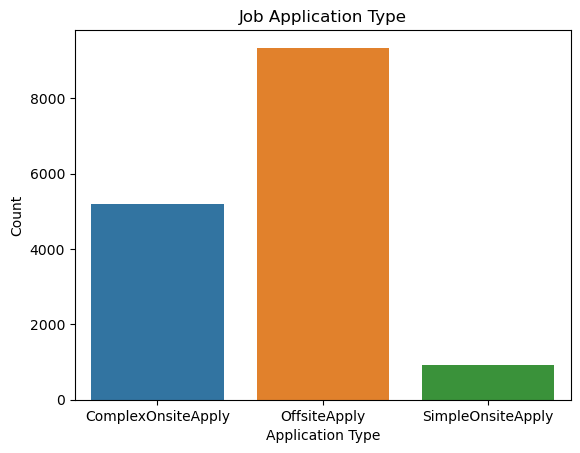

In [21]:
sns.countplot(data=job_posting, x='application_type')
plt.title('Job Application Type')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

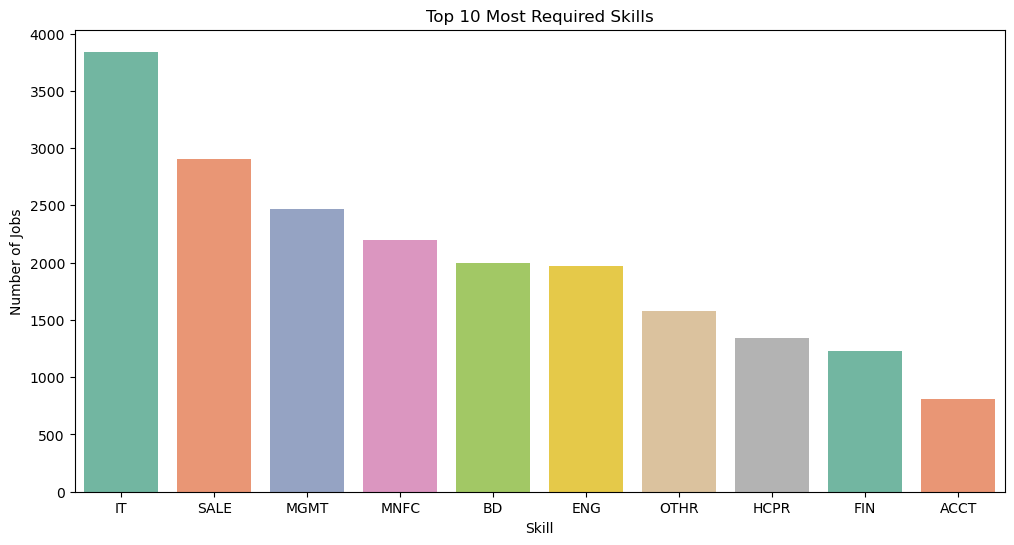

In [22]:
top_skills = job_skill['skill_abr'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills.index, y=top_skills.values, palette='Set2')
plt.title('Top 10 Most Required Skills')
plt.xlabel('Skill')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=0)
plt.show()

In [23]:
!pip install wordcloud

the most frequently occurring words in job titles from the 'job_posting' dataframe 

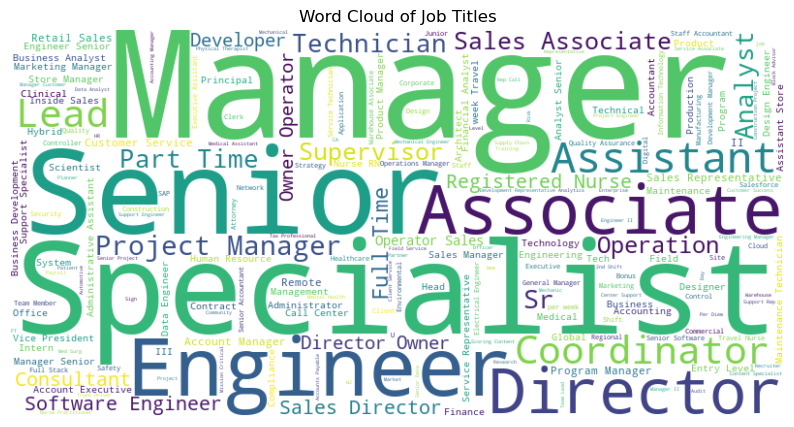

In [24]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(job_posting['title'].astype(str)))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Titles')
plt.show()


job postings available for different experience levels

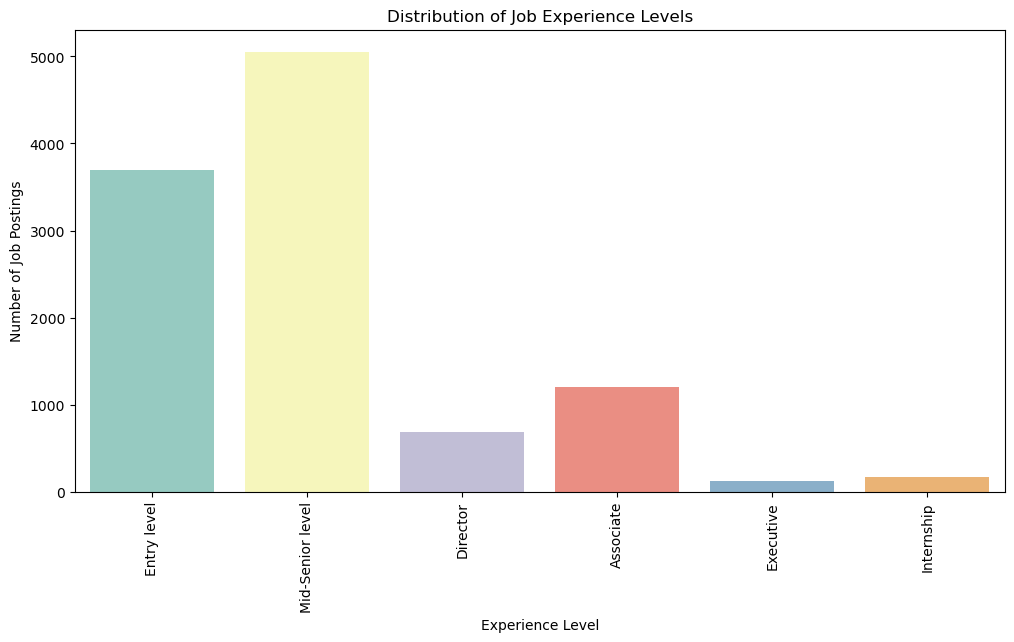

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(x='formatted_experience_level', data=job_posting, palette='Set3')
plt.title('Distribution of Job Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=90)
plt.show()